## Analysis of feature selection for cell line mutation prediction; single-cancer holdouts

TODO: document

In [1]:
import os
import sys

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import pancancer_evaluation.config as cfg
import pancancer_evaluation.utilities.analysis_utilities as au

%load_ext autoreload
%autoreload 2

In [2]:
# analysis of results generated by script:
# 07_purity_prediction/run_purity_prediction.py
# (with varying feature_selection parameters)

single_cancer_dir = os.path.join('results', 'ccle_mutation_ridge', 'single_cancer')
pancancer_dir = os.path.join('results', 'ccle_mutation_ridge', 'pancancer')
pancancer_only_dir = os.path.join('results', 'ccle_mutation_ridge', 'all_other_cancers')

# n_dims = [100, 250, 500, 1000, 5000]
n_dims = [100, 250, 500, 1000]

fs_methods = [
    'mad',
    'pancan_f_test',
    'median_f_test',
    'random'
]

# gene to plot results for
gene = 'PTEN'

# metric to plot results for
metric = 'aupr'
delta_metric = 'delta_{}'.format(metric)

# location to save plots to
output_plots = True
if metric == 'auroc':
    output_plots_dir = cfg.ccle_fs_plots_dir / 'ridge' / 'auroc'
else:
    output_plots_dir = cfg.ccle_fs_plots_dir / 'ridge'

### Load results

We load the results of the single cancer, pan-cancer, and "pan-cancer only" (aka "all other cancers") experiments here.

In [3]:
single_cancer_df = au.load_prediction_results_fs(
    single_cancer_dir, cfg.fs_methods
)
single_cancer_df = single_cancer_df[single_cancer_df.n_dims.isin(n_dims)].copy()
single_cancer_df['train_set'] = 'single_cancer'

for n in n_dims:
    for fs_method in fs_methods:
        single_cancer_df.loc[
            (single_cancer_df.fs_method == fs_method) & (single_cancer_df.n_dims == n),
            'fs_method'
        ] = '{}.{}'.format(fs_method, n)

print(np.unique(single_cancer_df.seed))
print(np.unique(single_cancer_df.n_dims))
print(np.unique(single_cancer_df.fs_method))
print(single_cancer_df.shape)
single_cancer_df.head()

[ 1 42]
[ 100  250  500 1000]
['mad.100' 'mad.1000' 'mad.250' 'mad.500' 'median_f_test.100'
 'median_f_test.1000' 'median_f_test.250' 'median_f_test.500'
 'pancan_f_test.100' 'pancan_f_test.1000' 'pancan_f_test.250'
 'pancan_f_test.500' 'random.100' 'random.1000' 'random.250' 'random.500']
(44544, 11)


,auroc,aupr,gene,holdout_cancer_type,signal,seed,data_type,fold,fs_method,n_dims,train_set
0,1.00000,1.00000,TP53,Head_and_Neck,shuffled,1,train,0,mad.250,250,single_cancer
1,0.37500,0.83549,TP53,Head_and_Neck,shuffled,1,test,0,mad.250,250,single_cancer
2,0.71296,0.94495,TP53,Head_and_Neck,shuffled,1,cv,0,mad.250,250,single_cancer
3,1.00000,1.00000,TP53,Head_and_Neck,shuffled,1,train,1,mad.250,250,single_cancer
4,0.45833,0.88410,TP53,Head_and_Neck,shuffled,1,test,1,mad.250,250,single_cancer


In [4]:
pancancer_df = au.load_prediction_results_fs(
    pancancer_dir, cfg.fs_methods
)
pancancer_df = pancancer_df[pancancer_df.n_dims.isin(n_dims)].copy()
pancancer_df['train_set'] = 'pancancer'

for n in n_dims:
    for fs_method in fs_methods:
        pancancer_df.loc[
            (pancancer_df.fs_method == fs_method) & (pancancer_df.n_dims == n),
            'fs_method'
        ] = '{}.{}'.format(fs_method, n)

print(np.unique(pancancer_df.seed))
print(np.unique(pancancer_df.fs_method))
print(pancancer_df.shape)
pancancer_df.head()

[ 1 42]
['mad.100' 'mad.1000' 'mad.250' 'mad.500' 'median_f_test.100'
 'median_f_test.1000' 'median_f_test.250' 'median_f_test.500'
 'pancan_f_test.100' 'pancan_f_test.1000' 'pancan_f_test.250'
 'pancan_f_test.500' 'random.100' 'random.1000' 'random.250' 'random.500']
(44544, 11)


,auroc,aupr,gene,holdout_cancer_type,signal,seed,data_type,fold,fs_method,n_dims,train_set
0,0.70126,0.80865,TP53,Head_and_Neck,shuffled,1,train,0,mad.250,250,pancancer
1,0.29167,0.78641,TP53,Head_and_Neck,shuffled,1,test,0,mad.250,250,pancancer
2,0.62348,0.75111,TP53,Head_and_Neck,shuffled,1,cv,0,mad.250,250,pancancer
3,0.69909,0.80390,TP53,Head_and_Neck,shuffled,1,train,1,mad.250,250,pancancer
4,0.25000,0.81105,TP53,Head_and_Neck,shuffled,1,test,1,mad.250,250,pancancer


In [5]:
pancancer_only_df = au.load_prediction_results_fs(
    pancancer_only_dir, cfg.fs_methods
)
pancancer_only_df = pancancer_only_df[pancancer_only_df.n_dims.isin(n_dims)].copy()
pancancer_only_df['train_set'] = 'pancancer_only'

for n in n_dims:
    for fs_method in fs_methods:
        pancancer_only_df.loc[
            (pancancer_only_df.fs_method == fs_method) & (pancancer_only_df.n_dims == n),
            'fs_method'
        ] = '{}.{}'.format(fs_method, n)

print(np.unique(pancancer_only_df.seed))
print(np.unique(pancancer_only_df.fs_method))
print(pancancer_only_df.shape)
pancancer_only_df.head()

[ 1 42]
['mad.100' 'mad.1000' 'mad.250' 'mad.500' 'median_f_test.100'
 'median_f_test.1000' 'median_f_test.250' 'median_f_test.500'
 'pancan_f_test.100' 'pancan_f_test.1000' 'pancan_f_test.250'
 'pancan_f_test.500' 'random.100' 'random.1000' 'random.250' 'random.500']
(44544, 11)


,auroc,aupr,gene,holdout_cancer_type,signal,seed,data_type,fold,fs_method,n_dims,train_set
0,0.70094,0.80366,TP53,Head_and_Neck,shuffled,1,train,0,mad.250,250,pancancer_only
1,0.29167,0.78641,TP53,Head_and_Neck,shuffled,1,test,0,mad.250,250,pancancer_only
2,0.61709,0.74089,TP53,Head_and_Neck,shuffled,1,cv,0,mad.250,250,pancancer_only
3,0.70094,0.80366,TP53,Head_and_Neck,shuffled,1,train,1,mad.250,250,pancancer_only
4,0.33333,0.82808,TP53,Head_and_Neck,shuffled,1,test,1,mad.250,250,pancancer_only


In [6]:
# get difference between true and shuffled models, split by
# feature selection method and holdout cancer type
def compare_from_experiment(experiment_df):
    compare_df = []
    for fs_method in experiment_df.fs_method.unique():
        for holdout_cancer_type in experiment_df.holdout_cancer_type.unique():
            compare_df.append(
                au.compare_control_ind(
                    experiment_df[
                        (experiment_df.fs_method == fs_method) &
                        (experiment_df.holdout_cancer_type == holdout_cancer_type)
                    ], metric=metric, verbose=True)
                  .assign(fs_method=fs_method,
                          holdout_cancer_type=holdout_cancer_type)
            )
    return pd.concat(compare_df)
    
single_cancer_compare_df = compare_from_experiment(single_cancer_df)
pancancer_compare_df = compare_from_experiment(pancancer_df)
pancancer_only_compare_df = compare_from_experiment(pancancer_only_df)

print(single_cancer_compare_df.shape,
      pancancer_compare_df.shape,
      pancancer_only_compare_df.shape)

(7424, 6) (7424, 6) (7424, 6)


In [7]:
# split fs_method and n_dims so we can make a line plot
# over different values of n_dims
for compare_df in [
    single_cancer_compare_df,
    pancancer_compare_df,
    pancancer_only_compare_df
]:
    compare_df[['fs_method', 'n_dims']] = compare_df.fs_method.str.split('.', 1, expand=True)
    compare_df['n_dims'] = compare_df.n_dims.astype(int)

In [8]:
print(single_cancer_compare_df.fs_method.unique())
print(single_cancer_compare_df.n_dims.unique())
single_cancer_compare_df.head()

['mad' 'median_f_test' 'pancan_f_test' 'random']
[ 250  100  500 1000]


,identifier,seed,fold,delta_aupr,fs_method,holdout_cancer_type,n_dims
0,PIK3CA,1,0,0.166670,mad,Head_and_Neck,250
1,PIK3CA,1,1,0.428571,mad,Head_and_Neck,250
2,PIK3CA,1,2,0.050000,mad,Head_and_Neck,250
3,PIK3CA,1,3,0.358330,mad,Head_and_Neck,250
4,PIK3CA,42,0,0.222220,mad,Head_and_Neck,250


### Plot average performance across cancer types and number of features selected

In [9]:
print(single_cancer_compare_df.identifier.unique())

['PIK3CA' 'TP53' 'KRAS' 'BRAF' 'PTEN' 'RB1' 'EGFR']


In [10]:
print(single_cancer_compare_df.fs_method.unique())

['mad' 'median_f_test' 'pancan_f_test' 'random']


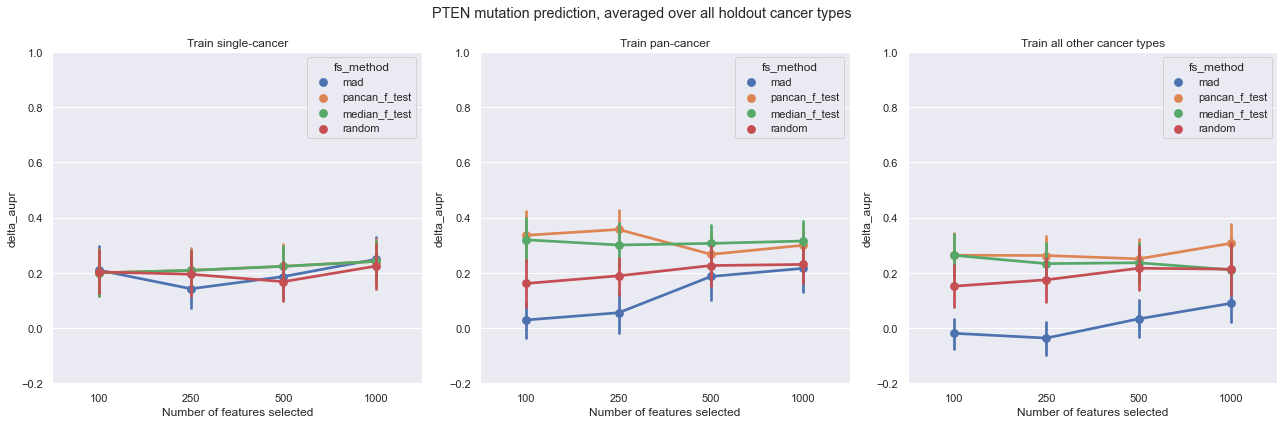

In [11]:
sns.set({'figure.figsize': (18, 6)})
sns.set_context('notebook')

fig, axarr = plt.subplots(1, 3)

dfs_to_plot = [
    single_cancer_compare_df,
    pancancer_compare_df,
    pancancer_only_compare_df
]

names_to_plot = [
    'Train single-cancer',
    'Train pan-cancer',
    'Train all other cancer types'
]

fs_method_order = [
    'mad',
    'pancan_f_test',
    'median_f_test',
    'random'
]


for ix, compare_df in enumerate(dfs_to_plot):
    ax = axarr[ix]
    # averaged over cancer types
    plot_df = (compare_df[(compare_df.identifier == gene)]
      .sort_values(by='n_dims', ascending=True)
    )
    sns.pointplot(data=plot_df, x='n_dims', y=delta_metric, hue='fs_method',
                  hue_order=fs_method_order, ax=ax)
    ax.set_title(names_to_plot[ix])
    ax.set_xlabel('Number of features selected')
    ax.set_ylim(-0.2, 1)
    
plt.suptitle('{} mutation prediction, averaged over all holdout cancer types'.format(gene))
plt.tight_layout()

if output_plots:
    output_plots_dir.mkdir(exist_ok=True)
    plt.savefig(output_plots_dir / '{}_ridge_all_summary.png'.format(gene),
                dpi=200, bbox_inches='tight')

In [12]:
# these are "non-carcinoma" cancer types in CCLE
# we anticipate that these will be the hardest to transfer models to (since
# most of CCLE, and thus most of our training set, is generally carcinomas),
# so it's valuable to look at results filtered only to these
non_carcinomas = [
    'Bone',
    'Brain',
    'Eye',
    'Leukemia',
    'Liposarcoma',
    'Lymphoma',
    'Myeloma',
    'Neuroblastoma',
    'Sarcoma',
    'Skin'
]

['Leukemia' 'Brain']


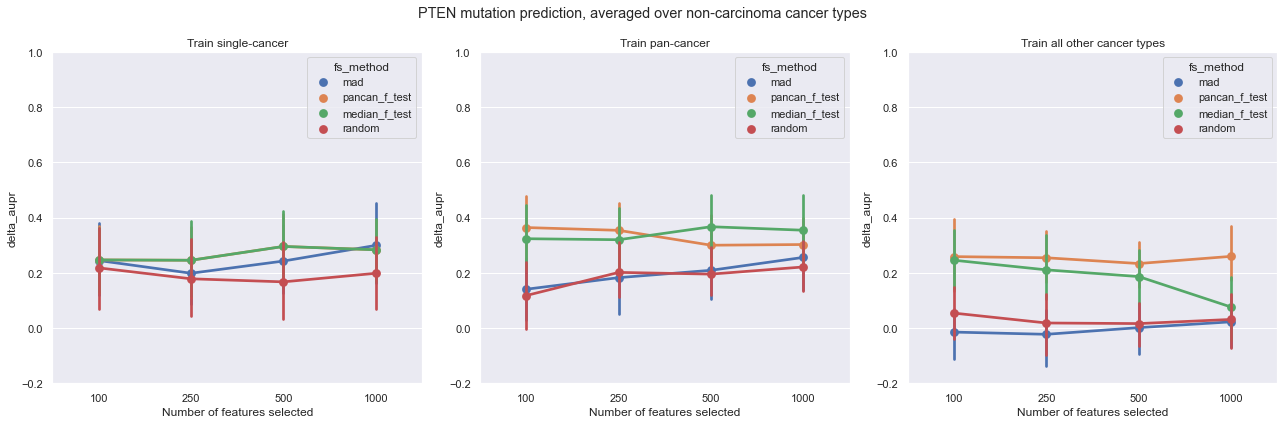

In [13]:
sns.set({'figure.figsize': (18, 6)})
sns.set_context('notebook')

fig, axarr = plt.subplots(1, 3)

dfs_to_plot = [
    single_cancer_compare_df,
    pancancer_compare_df,
    pancancer_only_compare_df
]

names_to_plot = [
    'Train single-cancer',
    'Train pan-cancer',
    'Train all other cancer types'
]


for ix, compare_df in enumerate(dfs_to_plot):
    ax = axarr[ix]
    # averaged over non-carcinoma cancer types
    plot_df = (compare_df[(compare_df.identifier == gene) &
                          (compare_df.holdout_cancer_type.isin(non_carcinomas))]
      .sort_values(by='n_dims', ascending=True)
    )
    if ix == 0:
        # look at which cancer types are actually present in dataset
        print(plot_df.holdout_cancer_type.unique(), file=sys.stderr)
    sns.pointplot(data=plot_df, x='n_dims', y=delta_metric, hue='fs_method',
                  hue_order=fs_method_order, ax=ax)
    ax.set_title(names_to_plot[ix])
    ax.set_xlabel('Number of features selected')
    ax.set_ylim(-0.2, 1)
    
plt.suptitle('{} mutation prediction, averaged over non-carcinoma cancer types'.format(gene))
plt.tight_layout()

if output_plots:
    plt.savefig(output_plots_dir / '{}_ridge_non_carcinoma_summary.png'.format(gene),
                dpi=200, bbox_inches='tight')

### Plot performance broken down by cancer type

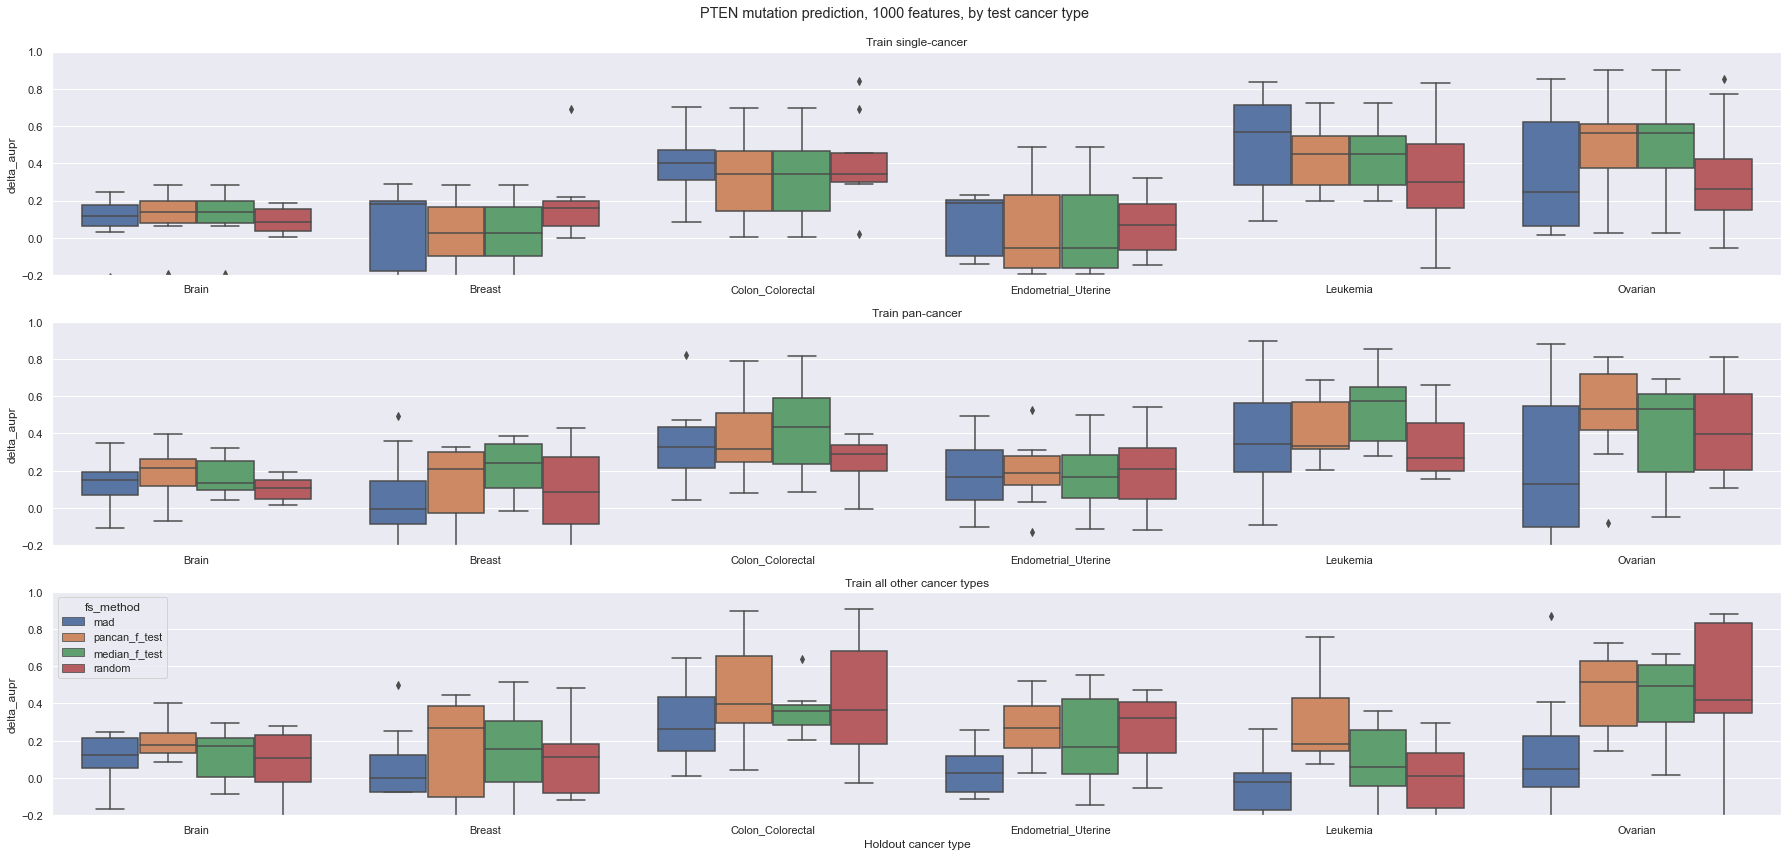

In [14]:
sns.set({'figure.figsize': (25, 12)})
sns.set_context('notebook')

fig, axarr = plt.subplots(3, 1)

dfs_to_plot = [
    single_cancer_compare_df,
    pancancer_compare_df,
    pancancer_only_compare_df
]

names_to_plot = [
    'Train single-cancer',
    'Train pan-cancer',
    'Train all other cancer types'
]

max_n_dims = max(n_dims)

# split individual cancer types
for ix, compare_df in enumerate(dfs_to_plot):
    ax = axarr[ix]
    plot_df = (compare_df[(compare_df.identifier == gene) &
                          (compare_df.n_dims == max_n_dims)]
      .sort_values(by='holdout_cancer_type')
    )
    sns.boxplot(data=plot_df, x='holdout_cancer_type', 
                y=delta_metric, hue='fs_method', 
                hue_order=fs_method_order, ax=ax)
    ax.set_title(names_to_plot[ix])
    if ix == len(dfs_to_plot) - 1:
        ax.set_xlabel('Holdout cancer type')
    else:
        ax.set_xlabel('')
        ax.get_legend().remove()
    ax.set_ylim(-0.2, 1)
    
plt.suptitle('{} mutation prediction, {} features, by test cancer type'.format(gene, max_n_dims), y=0.99)
plt.tight_layout()

if output_plots:
    plt.savefig(output_plots_dir / '{}_ridge_all_by_cancer_type.png'.format(gene),
                dpi=200, bbox_inches='tight')

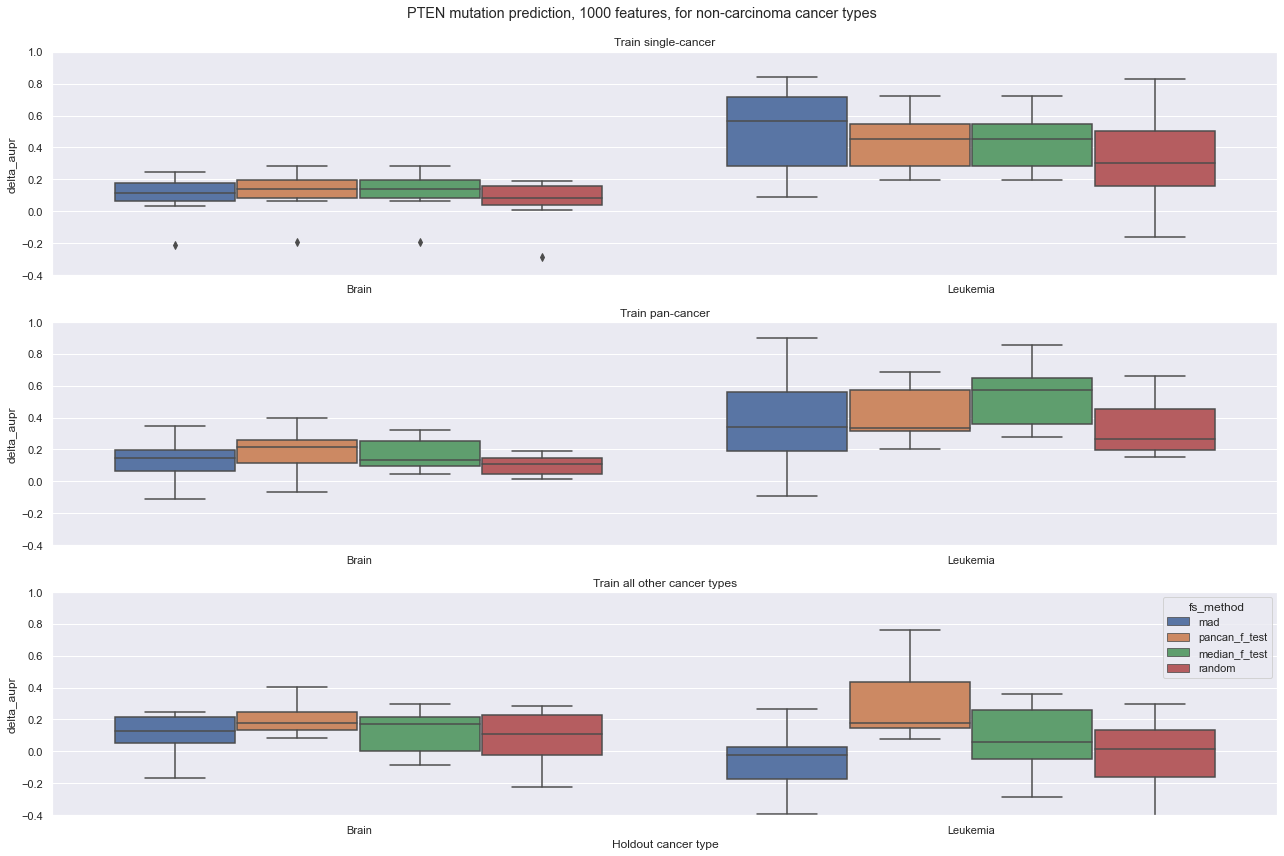

In [15]:
sns.set({'figure.figsize': (18, 12)})
sns.set_context('notebook')

fig, axarr = plt.subplots(3, 1)

dfs_to_plot = [
    single_cancer_compare_df,
    pancancer_compare_df,
    pancancer_only_compare_df
]

names_to_plot = [
    'Train single-cancer',
    'Train pan-cancer',
    'Train all other cancer types'
]

# split individual cancer types
for ix, compare_df in enumerate(dfs_to_plot):
    ax = axarr[ix]
    plot_df = (
        compare_df[(compare_df.identifier == gene) &
                   (compare_df.n_dims == max_n_dims) &
                   (compare_df.holdout_cancer_type.isin(non_carcinomas))]
          .sort_values(by='holdout_cancer_type')
    )
    sns.boxplot(data=plot_df, x='holdout_cancer_type', 
                y=delta_metric, hue='fs_method', 
                hue_order=fs_method_order, ax=ax)
    ax.set_title(names_to_plot[ix])
    if ix == len(dfs_to_plot) - 1:
        ax.set_xlabel('Holdout cancer type')
    else:
        ax.set_xlabel('')
        ax.get_legend().remove()
    ax.set_ylim(-0.4, 1)
    
plt.suptitle('{} mutation prediction, {} features, for non-carcinoma cancer types'.format(
    gene, max_n_dims), y=0.99)
plt.tight_layout()

if output_plots:
    plt.savefig(output_plots_dir / '{}_ridge_non_carcinoma_by_cancer_type.png'.format(gene),
                dpi=200, bbox_inches='tight')

### Plot performance broken down by cancer type and test set

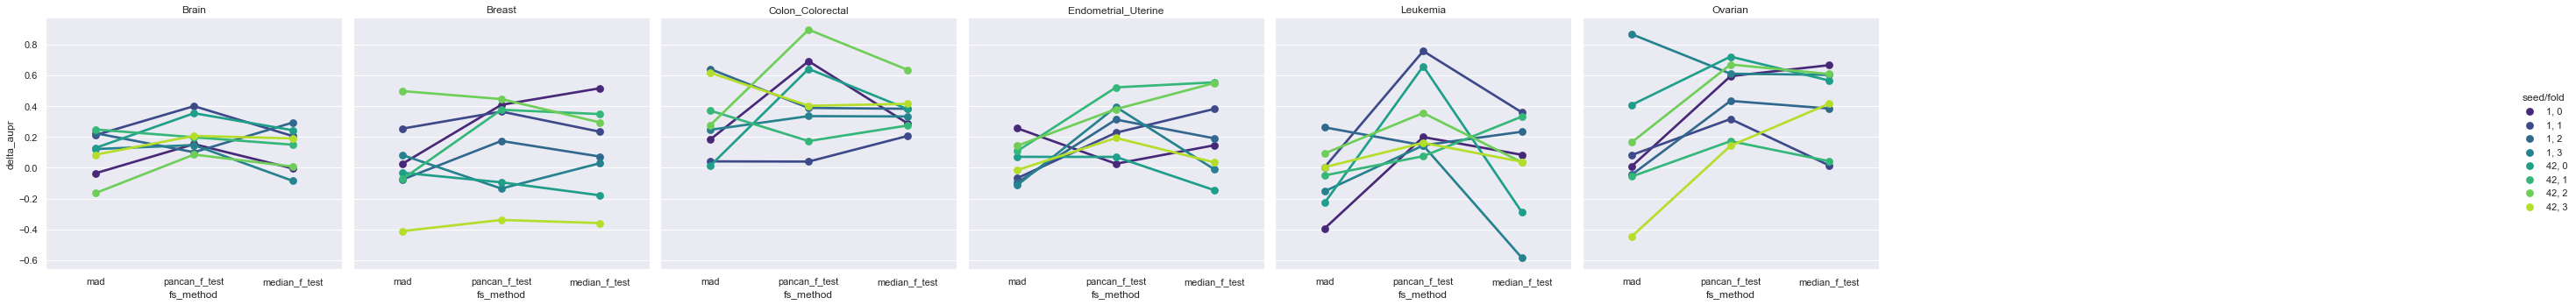

In [16]:
sns.set({'figure.figsize': (15, 6)})
sns.set_context('notebook')

plot_fs_methods = [
    'mad',
    'pancan_f_test',
    'median_f_test'
]

plot_df = (
    pancancer_only_compare_df[
        (pancancer_only_compare_df.identifier == gene) &
        (pancancer_only_compare_df.n_dims == max_n_dims) &
        (pancancer_only_compare_df.fs_method.isin(plot_fs_methods))
    ].sort_values(by='holdout_cancer_type')
).sort_values(by=['seed', 'fold'])
plot_df['seed/fold'] = plot_df.seed.astype(str) + ', ' + plot_df.fold.astype(str)

g = sns.catplot(
    data=plot_df, x='fs_method', y=delta_metric, col='holdout_cancer_type',
    hue='seed/fold', kind='point', col_wrap=8, order=plot_fs_methods,
    palette='viridis'
)
g.set_titles(col_template='{col_name}')

if output_plots:
    plt.savefig(output_plots_dir / '{}_ridge_by_cancer_type_lines.png'.format(gene),
                dpi=200, bbox_inches='tight')

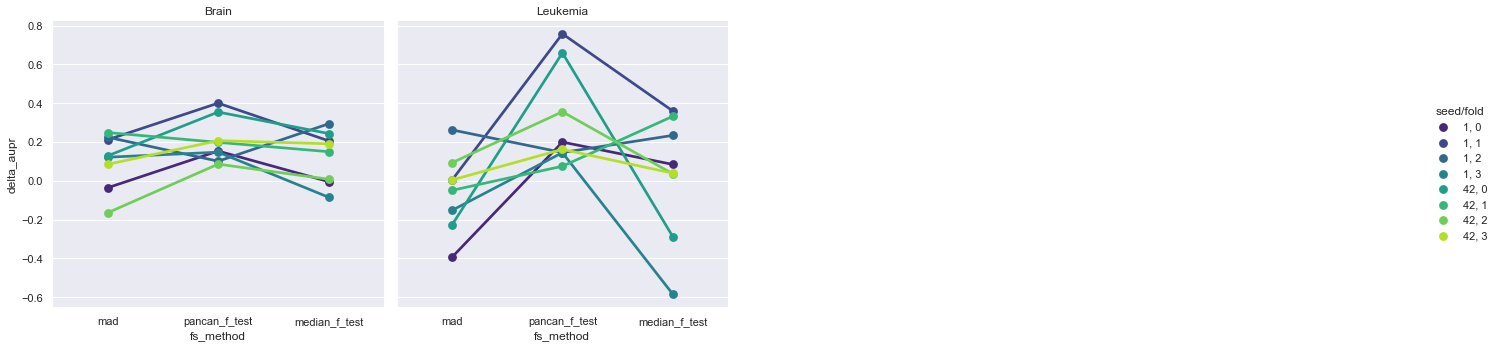

In [17]:
sns.set({'figure.figsize': (15, 6)})
sns.set_context('notebook')

plot_fs_methods = [
    'mad',
    'pancan_f_test',
    'median_f_test'
]

plot_df = (
    pancancer_only_compare_df[
        (pancancer_only_compare_df.identifier == gene) &
        (pancancer_only_compare_df.n_dims == max_n_dims) &
        (pancancer_only_compare_df.holdout_cancer_type.isin(non_carcinomas)) &
        (pancancer_only_compare_df.fs_method.isin(plot_fs_methods))
    ].sort_values(by='holdout_cancer_type')
).sort_values(by=['seed', 'fold'])
plot_df['seed/fold'] = plot_df.seed.astype(str) + ', ' + plot_df.fold.astype(str)

g = sns.catplot(
    data=plot_df, x='fs_method', y=delta_metric, col='holdout_cancer_type',
    hue='seed/fold', kind='point', col_wrap=4, order=plot_fs_methods,
    palette='viridis'
)
g.set_titles(col_template='{col_name}')

if output_plots:
    plt.savefig(output_plots_dir / '{}_ridge_non_carcinoma_by_cancer_type_lines.png'.format(gene),
                dpi=200, bbox_inches='tight')